# **PaisaBazaar Banking Fraud Analysis**

#### ***Project Type: EDA (Individual Project)***

#### ***Project Summary***

**Problem Statement:**
In today’s financial landscape, accurate credit score assessment is vital for both financial institutions and customers. Paisabazaar, a financial services company, helps individuals find and apply for banking and credit products. A key aspect of their business involves assessing customers’ creditworthiness to provide personalized financial recommendations and ensure sound risk management practices. This case study focuses on analyzing, classifying, and predicting credit scores based on a range of customer data, such as income, credit card usage, and payment behavior. The goal is to help Paisabazaar improve their credit assessment processes, reduce loan defaults, and optimize customer services through better-informed decisions.

#### ***Github Link***


In [145]:
# Import Libraries
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [146]:
# Load Dataset
data = pd.read_csv(r'C:\Users\spand\Projects\LABMENTIX_PROJECTS\PaisaBazaar\Data\Raw\dataset-2.csv')
data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,4.0,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,4.0,11.27,4.0,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,4.0,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5.0,4.0,6.27,4.0,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6.0,4.0,11.27,4.0,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [147]:
data.tail()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
99995,155625,37932,4,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,"Auto Loan, and Student Loan",23.0,7.0,11.5,3.0,Good,502.38,34.663572,378.0,No,35.104023,24.028477,High_spent_Large_value_payments,479.866228,Poor
99996,155626,37932,5,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,"Auto Loan, and Student Loan",18.0,7.0,11.5,3.0,Good,502.38,40.565631,379.0,No,35.104023,24.028477,High_spent_Medium_value_payments,496.651610,Poor
99997,155627,37932,6,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,"Auto Loan, and Student Loan",27.0,6.0,11.5,3.0,Good,502.38,41.255522,380.0,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99998,155628,37932,7,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,"Auto Loan, and Student Loan",20.0,6.0,11.5,3.0,Good,502.38,33.638208,381.0,No,35.104023,24.028477,Low_spent_Large_value_payments,319.164979,Standard
99999,155629,37932,8,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,"Auto Loan, and Student Loan",18.0,6.0,11.5,3.0,Good,502.38,34.192463,382.0,No,35.104023,24.028477,High_spent_Medium_value_payments,393.673696,Poor


In [148]:
# Dataset rows and columns
print(f'No. of rows in the dataset: {data.shape[0]}')
print(f'No. of columns in the dataset: {data.shape[1]}')

No. of rows in the dataset: 100000
No. of columns in the dataset: 28


In [149]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [150]:
# Duplicate Value Count
duplicate_count = data.duplicated().sum() # Counts duplicate rows
print(f"No. of duplicate rows: {duplicate_count}")

No. of duplicate rows: 0


In [151]:
# Numerical columns of the dataset
num_cols = [col for col in data.columns if data[col].dtype != 'O']
print(f'No. of numerical columns: {len(num_cols)}')
print(f'Column names: {num_cols}')

No. of numerical columns: 21
Column names: ['ID', 'Customer_ID', 'Month', 'Age', 'SSN', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']


In [152]:
# Categorical columns of the dataset
cat_cols = [col for col in data.columns if data[col].dtype == 'O']
print(f'No. of categorical columns: {len(cat_cols)}')
print(f'Column names: {cat_cols}')

No. of categorical columns: 7
Column names: ['Name', 'Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score']


#### ***Dataset Overview:***

- The dataset contains 100,000 records (rows) and 28 features (columns) out of which 21 numerical & 7 categorical columns
- It is a fairly clean dataset as it does not contain any duplicate or NaN values
- The target variable of the dataset is Credit_Score
- Features include demographic details (Age, Occupation), financial attributes (Income, Debt, Credit Utilization), behavioral factors (Payment Behavior, Payment of Minimum Amount) & some identifier columns (ID, Customer_ID, Name, SSN)

In [153]:
# Descriptive statistics of numerical columns
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,100000.0,8.063150e+04,4.330149e+04,5634.000000,4.313275e+04,8.063150e+04,1.181302e+05,1.556290e+05
Customer_ID,100000.0,2.598267e+04,1.434054e+04,1006.000000,1.366450e+04,2.577700e+04,3.838500e+04,5.099900e+04
Month,100000.0,4.500000e+00,2.291299e+00,1.000000,2.750000e+00,4.500000e+00,6.250000e+00,8.000000e+00
Age,100000.0,3.331634e+01,1.076481e+01,14.000000,2.400000e+01,3.300000e+01,4.200000e+01,5.600000e+01
SSN,100000.0,5.004617e+08,2.908267e+08,81349.000000,2.451686e+08,5.006886e+08,7.560027e+08,9.999934e+08
Annual_Income,100000.0,5.050512e+04,3.829942e+04,7005.930000,1.934297e+04,3.699971e+04,7.168347e+04,1.799873e+05
Monthly_Inhand_Salary,100000.0,4.197271e+03,3.186432e+03,303.645417,1.626594e+03,3.095905e+03,5.957715e+03,1.520463e+04
Num_Bank_Accounts,100000.0,5.368820e+00,2.593314e+00,0.000000,3.000000e+00,5.000000e+00,7.000000e+00,1.100000e+01
Num_Credit_Card,100000.0,5.533570e+00,2.067098e+00,0.000000,4.000000e+00,5.000000e+00,7.000000e+00,1.100000e+01
Interest_Rate,100000.0,1.453208e+01,8.741330e+00,1.000000,7.000000e+00,1.300000e+01,2.000000e+01,3.400000e+01


In [154]:
# Descriptive statistics of categorical columns
data.describe(include=['object']).T

,count,unique,top,freq
Name,100000,10128,Jessicad,48
Occupation,100000,15,Lawyer,7096
Type_of_Loan,100000,6261,No Data,11408
Credit_Mix,100000,3,Standard,45848
Payment_of_Min_Amount,100000,3,Yes,52326
Payment_Behaviour,100000,6,Low_spent_Small_value_payments,28616
Credit_Score,100000,3,Standard,53174


In [155]:
# Check Unique Values for each variable
data.nunique()

ID                          100000
Customer_ID                  12500
Month                            8
Name                         10128
Age                             43
SSN                          12500
Occupation                      15
Annual_Income                12488
Monthly_Inhand_Salary        13241
Num_Bank_Accounts               12
Num_Credit_Card                 12
Interest_Rate                   34
Num_of_Loan                     10
Type_of_Loan                  6261
Delay_from_due_date             63
Num_of_Delayed_Payment          26
Changed_Credit_Limit          3452
Num_Credit_Inquiries            18
Credit_Mix                       3
Outstanding_Debt             12203
Credit_Utilization_Ratio    100000
Credit_History_Age             404
Payment_of_Min_Amount            3
Total_EMI_per_month          11890
Amount_invested_monthly      12261
Payment_Behaviour                6
Monthly_Balance              98494
Credit_Score                     3
dtype: int64

#### ***Variable Understanding:***

***Numerical Features***

- ***Age:*** Ranges from 14 to 56 years, with a mean of ~33. The dataset covers mainly young to middle-aged customers.
- ***Annual_Income & Monthly_Inhand_Salary:*** Show wide variability, with a few extreme outliers (max income ~1.9M). Distributions are right-skewed, indicating a small group of very high-income customers.
- ***Num_Bank_Accounts & Num_Credit_Card:*** Median values are 5 accounts/cards, but the spread shows some customers hold up to 11 accounts or 9 cards. Possible outliers exist.
- ***Interest_Rate:*** Ranges from 1% to 34%, with a mean of 14%. Some customers face unusually high borrowing costs.
- ***Delay_from_due_date & Num_of_Delayed_Payment:*** Median payment delay is 14 days, with a maximum of 56 days. This highlights a large group of customers who frequently delay payments.
- ***Outstanding_Debt & Total_EMI_per_month:*** Extremely wide ranges (Outstanding debt up to ~4.9M). Strong indicators of financial burden.
- ***Credit_Utilization_Ratio:*** Between 20%–55%, median ~32%. Ratios above 30% may indicate risky borrowers.
- ***Credit_History_Age:*** Median ~21 years, max 42 years. May contain synthetic or unrealistic values for younger customers.
- ***Amount_invested_monthly & Monthly_Balance:*** Large variability with extreme outliers. Potential data entry errors or wealthy customers represented.
  
***Categorical Features***

- ***Occupation:*** 15 unique categories. Most common = Lawyer (7,096 records).
- ***Type_of_Loan:*** 6,261 unique entries with many variations and “No Data” entries (~11,408). Likely contains messy/free-text data requiring cleaning and grouping.
- ***Credit_Mix:*** 3 categories (Standard, Good, Bad), with Standard dominating (~45%). Imbalance exists.
- ***Payment_of_Min_Amount:*** 3 Categories = Yes/No/NM. Majority are Yes (~52%). Needs encoding and handling of “NM” values.
- ***Payment_Behaviour:*** 6 categories, most common is Low_spent_Small_value_payments (~28k).
- ***Credit_Score (Target Variable):*** 3 categories (Good, Standard, Poor). Standard beign ~53% of the data clearly shows imbalanced distribution 

### ***Data Wrangling***

In [156]:
# Make a copy of your dataset 
clean_df = data.copy()

# Let's drop pure identifier columns 
id_cols = ['ID', 'Customer_ID', 'Name', 'SSN']
clean_df.drop(columns=id_cols, inplace=True, errors='ignore')

# Fix anomalies
clean_df = clean_df[clean_df['Age'].between(18, 100)]   # keep realistic ages
clean_df = clean_df[clean_df['Annual_Income'] > 0]      # remove negative/zero income

# Feature Engineering 
clean_df['Income_Bracket'] = pd.cut(clean_df['Annual_Income'], bins=[0, 20000, 50000, 100000], labels=['Low', 'Medium', 'High']) # Income bracket
clean_df['Debt_to_Income_Ratio'] = clean_df['Outstanding_Debt'] / clean_df['Annual_Income'] # Credit Burden = Outstanding Debt / Annual Income

In [157]:
clean_df['Type_of_Loan'].value_counts()

Type_of_Loan
No Data                                                                                                                                                        11250
Not Specified                                                                                                                                                   1392
Personal Loan                                                                                                                                                   1272
Credit-Builder Loan                                                                                                                                             1272
Debt Consolidation Loan                                                                                                                                         1256
                                                                                                                                                               ...

In [158]:
# Checking how No Data rows look like
no_data_rows = clean_df[clean_df['Type_of_Loan'] == "No Data"]
pd.set_option('display.max_columns', None)
no_data_rows.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Income_Bracket,Debt_to_Income_Ratio
32,1,21.0,Developer,35547.71,2853.309167,7.0,5.0,5.0,0.0,No Data,5.0,15.0,2.58,4.0,Standard,943.86,39.797764,368.0,Yes,0.0,37.643638,High_spent_Medium_value_payments,288.605522,Standard,Medium,0.026552
33,2,21.0,Developer,35547.71,2853.309167,7.0,5.0,5.0,0.0,No Data,9.0,15.0,2.58,4.0,Standard,943.86,27.020360,369.0,NM,0.0,37.643638,High_spent_Medium_value_payments,460.887276,Standard,Medium,0.026552
34,3,21.0,Developer,35547.71,2853.309167,7.0,5.0,5.0,0.0,No Data,5.0,12.0,2.58,4.0,Standard,943.86,23.462303,370.0,Yes,0.0,37.643638,Low_spent_Medium_value_payments,392.192266,Standard,Medium,0.026552
35,4,21.0,Developer,35547.71,2853.309167,7.0,5.0,5.0,0.0,No Data,1.0,15.0,2.58,4.0,Standard,943.86,28.924954,371.0,Yes,0.0,37.643638,High_spent_Medium_value_payments,438.545432,Standard,Medium,0.026552
36,5,21.0,Developer,35547.71,2853.309167,7.0,5.0,5.0,0.0,No Data,9.0,17.0,2.58,4.0,Standard,943.86,41.776187,372.0,Yes,0.0,37.643638,High_spent_Small_value_payments,482.607638,Standard,Medium,0.026552


In [159]:
# Replace placeholders with NaN
clean_df['Type_of_Loan'] = clean_df['Type_of_Loan'].replace(["No Data", "Not Specified"], np.nan)

# Let's create a rule based mapping function to handle this
def map_loan_type(row):
    # Rule 1: Younger customers (<25) with missing loan type → Student Loan
    if pd.isna(row['Type_of_Loan']) and row['Age'] < 25:
        return 'Student Loan'
    
    # Rule 2: Very high outstanding debt → Home Loan
    elif pd.isna(row['Type_of_Loan']) and row['Outstanding_Debt'] > 50000:
        return 'Home Loan'
    
    # Rule 3: High utilization ratio → Credit-Card Loan
    elif pd.isna(row['Type_of_Loan']) and row['Credit_Utilization_Ratio'] > 40:
        return 'Credit-Card Loan'
    
    # Rule 4: Low credit inquiries + long credit history → Mortgage Loan
    elif pd.isna(row['Type_of_Loan']) and row['Num_Credit_Inquiries'] < 2 and row['Credit_History_Age'] > 120:
        return "Mortgage Loan"
    
    # Rule 5: Very high number of inquiries → Personal Loan
    elif pd.isna(row['Type_of_Loan']) and row['Num_Credit_Inquiries'] > 10:
        return "Personal Loan"
    
    # Rule 6: Salary + stable payment → Auto Loan
    elif pd.isna(row['Type_of_Loan']) and row['Annual_Income'] > 1000000 and row['Delay_from_due_date'] < 2:
        return "Auto Loan"
    
    # Default fallback
    elif pd.isna(row['Type_of_Loan']):
        return "Personal Loan"
    
    else:
        return row['Type_of_Loan']

# Apply rule-based mapping
clean_df['Type_of_Loan'] = clean_df.apply(map_loan_type, axis=1)
clean_df['Type_of_Loan'].value_counts()

Type_of_Loan
Personal Loan                                                                                                                                                  8193
Mortgage Loan                                                                                                                                                  3553
Student Loan                                                                                                                                                   3472
Credit-Builder Loan                                                                                                                                            1272
Debt Consolidation Loan                                                                                                                                        1256
                                                                                                                                                               ... 
Stu

### ***EDA***

In [160]:
# Split numerical & categorical features
num_features = [feature for feature in clean_df.columns if clean_df[feature].dtype != 'O']
cat_features = [feature for feature in clean_df.columns if clean_df[feature].dtype == 'O']

#### **Univariate Analysis** 

#### ***Using Boxplot and Histogram with KDE for Outlier Detection***
***Rationale:***
- Boxplots are a standard statistical tool for detecting outliers based on the Interquartile Range (IQR) method.
- Histograms with KDE provide a distributional context to interpret whether those outliers are genuine anomalies or part of the underlying data pattern.
- This reduces the risk of incorrectly removing legitimate observations and ensures that outlier treatment decisions are data-driven and well-justified.

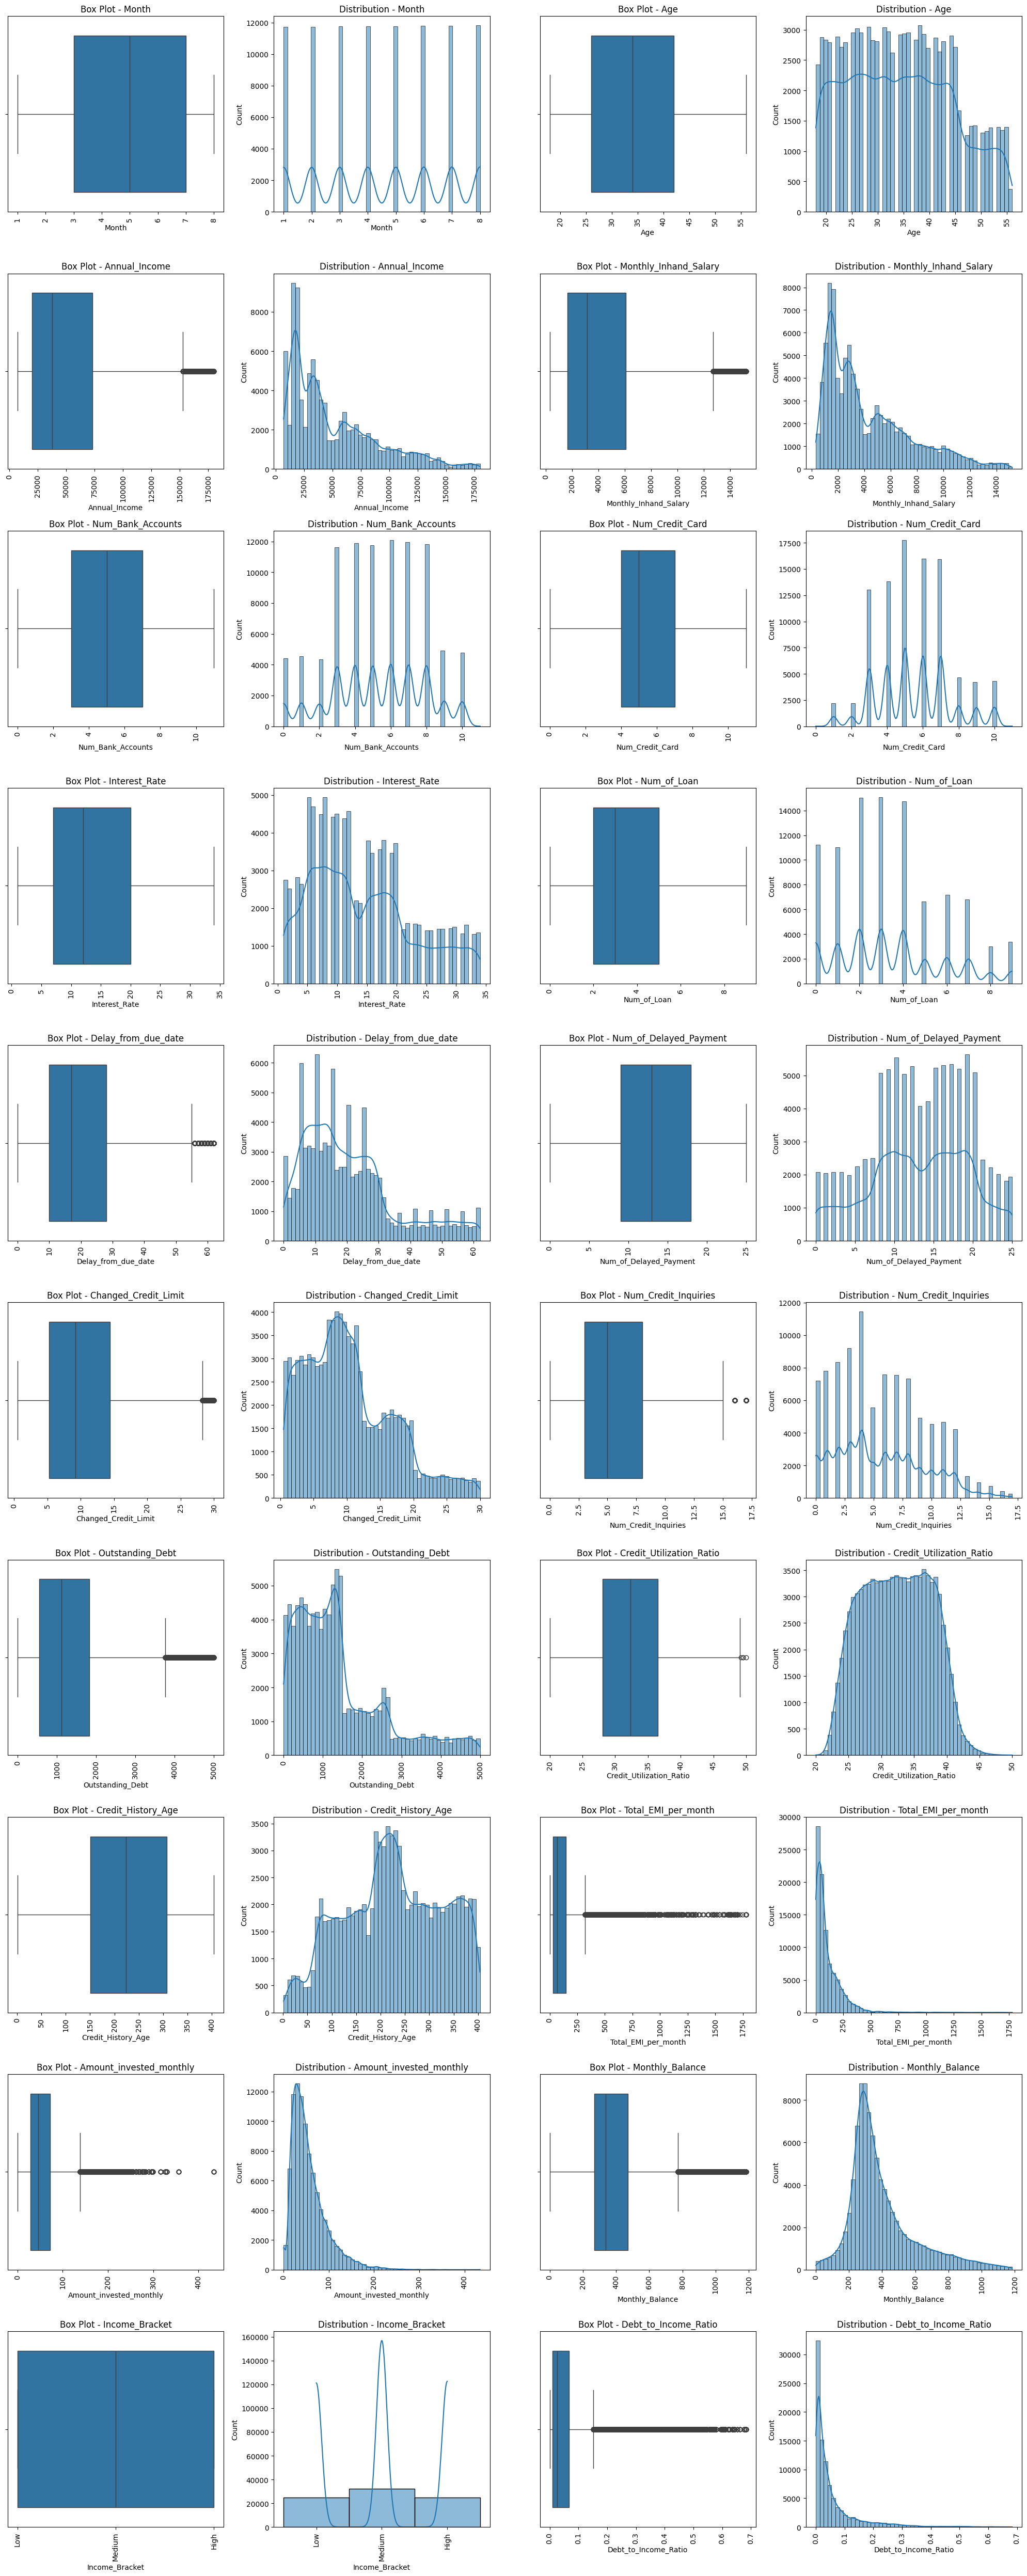

In [161]:
# Identify outliers by visualizing them
def plot_outliers(df, cols):
    n = len(cols)
    rows = math.ceil(n / 2)   # 2 features per row
    fig, axes = plt.subplots(rows, 4, figsize=(20, 5 * rows))  
    axes = axes.flatten()

    for i, col in enumerate(cols):
        # Boxplot
        sns.boxplot(data=df, x=col, ax=axes[i*2])
        axes[i*2].set_title(f'Box Plot - {col}')
        axes[i*2].tick_params(axis='x', rotation=90)

        # Distribution Plot
        sns.histplot(data=df, x=col, kde=True, bins=50, ax=axes[i*2+1])
        axes[i*2+1].set_title(f'Distribution - {col}')
        axes[i*2+1].tick_params(axis='x', rotation=90)

    plt.tight_layout()
    plt.show()

plot_outliers(clean_df, num_features)

- ***Month:*** Even distribution across months — no seasonal bias in the dataset. No significant outliers.
- ***Age:*** Customers are mainly concentrated between 25–45 years. Few extreme outliers at older ages — could represent long-term customers or rare cases.
- ***Annual_Income:*** Highly right-skewed — most customers earn below ₹1M annually. High-income outliers could distort averages — median is better for analysis.
- ***Monthly_Inhand_Salary:*** Strongly right-skewed — most customers earn under ₹100k/month. Some extreme high salaries — potential VIP segment.
- ***Num_Bank_Accounts:*** Majority have <10 bank accounts. Outliers with >20 accounts may indicate businesses or fraud risk.
- ***Num_Credit_Card:*** Clustered under 8 cards. Outliers >10 cards could indicate high credit exposure.
- ***Interest_Rate:*** Concentrated between 10–20%. Very high interest rates could be associated with high-risk customers.
- ***Num_of_Loan:*** Most customers have 1–5 loans. High-loan outliers (>10) are rare and risky.
- ***Delay_from_due_date:*** Most payments are delayed by <10 days. Significant long delays in some cases — potential credit risk.
- ***Num_of_Delayed_Payment:*** Most customers have fewer than 10 delayed payments. Some extreme repeat offenders — strong negative credit indicator.
- ***Changed_Credit_Limit:*** Most credit limits change within ±30%. Large changes may indicate financial instability or upgrades.
- ***Num_Credit_Inquiries:*** Most customers have <10 inquiries. High inquiries suggest aggressive credit-seeking — possible fraud/instability.
- ***Outstanding_Debt:*** Most customers have debt < ₹1M. High-debt customers are a major default risk.
- ***Credit_Utilization_Ratio:*** Most between 0.2–0.8. Very high utilization (>0.9) — high-risk borrowers.
- ***Credit_History_Age:*** Majority between 100–300 months (8–25 years). Very short histories increase risk.
- ***Total_EMI_per_month:*** Most customers have EMI < ₹20k. Outliers with >₹100k EMI — risk of over-leverage.
- ***Amount_invested_monthly:*** Most invest <₹10k/month. Higher investments could indicate good financial stability.
- ***Monthly_Balance:*** Positive balances dominate, but low or negative balances can indicate stress.
- ***Income_Bracket:*** Distribution shows strong clustering in Low and Medium income groups. High-income group is small but important for premium products.
- ***Debt_to_Income_Ratio:*** Most customers <0.5 DTI. High DTI (>0.8) — major default risk.

In [162]:
def handle_outliers(df):
    """
    Simple, domain-focused outlier handling for Paisa Bazaar credit data
    Based on financial industry knowledge and business logic
    """
    
    # Create a copy to avoid modifying original data
    clean_df = df.copy()
    
    print("Handling outliers with domain knowledge...")
    print("="*50)
    
    # 1. INCOME & SALARY FEATURES - Cap extreme values (heavy right skew)
    income_salary_features = ["Annual_Income", "Monthly_Inhand_Salary"]
    
    for col in income_salary_features:
        if col in clean_df.columns:
            # Cap at 1st and 99th percentile to remove extreme outliers
            lower = clean_df[col].quantile(0.01)
            upper = clean_df[col].quantile(0.99)
            
            outliers_removed = ((clean_df[col] < lower) | (clean_df[col] > upper)).sum()
            clean_df[col] = np.clip(clean_df[col], lower, upper)
            
            print(f"✓ {col}: Capped {outliers_removed} extreme values")
    
    # 2. DEBT & EMI FEATURES - Cap extreme values but preserve high-risk signals
    debt_emi_features = ["Outstanding_Debt", "Total_EMI_per_month", "Amount_invested_monthly"]
    
    for col in debt_emi_features:
        if col in clean_df.columns:
            # More conservative capping - keep 99.5% of data
            upper = clean_df[col].quantile(0.995)
            
            outliers_removed = (clean_df[col] > upper).sum()
            clean_df[col] = np.where(clean_df[col] > upper, upper, clean_df[col])
            
            print(f"✓ {col}: Capped {outliers_removed} extreme values at {upper:.0f}")
    
    # 3. BEHAVIORAL FEATURES - Keep outliers as they're business signals
    behavioral_features = ["Num_Credit_Inquiries", "Num_of_Loan", "Delay_from_due_date", 
                          "Num_of_Delayed_Payment"]
    
    for col in behavioral_features:
        if col in clean_df.columns:
            # Only remove the most extreme 0.5% (likely data errors)
            upper = clean_df[col].quantile(0.995)
            
            outliers_removed = (clean_df[col] > upper).sum()
            clean_df[col] = np.where(clean_df[col] > upper, upper, clean_df[col])
            
            print(f"✓ {col}: Preserved most outliers, capped only {outliers_removed} extreme cases")
    
    # 4. ACCOUNT FEATURES - Reasonable limits
    if "Num_Bank_Accounts" in clean_df.columns:
        # Most people don't have more than 10 bank accounts
        outliers = (clean_df["Num_Bank_Accounts"] > 10).sum()
        clean_df["Num_Bank_Accounts"] = np.clip(clean_df["Num_Bank_Accounts"], 0, 10)
        print(f"✓ Num_Bank_Accounts: Capped {outliers} values above 10")
    
    if "Num_Credit_Card" in clean_df.columns:
        # Reasonable credit card limit
        outliers = (clean_df["Num_Credit_Card"] > 15).sum()
        clean_df["Num_Credit_Card"] = np.clip(clean_df["Num_Credit_Card"], 0, 15)
        print(f"✓ Num_Credit_Card: Capped {outliers} values above 15")
    
    print("\nOUTLIER HANDLING COMPLETED")
    print(f"Dataset shape: {clean_df.shape}")
    
    return clean_df

clean_df = handle_outliers(clean_df)

Handling outliers with domain knowledge...
✓ Annual_Income: Capped 1878 extreme values
✓ Monthly_Inhand_Salary: Capped 1878 extreme values
✓ Outstanding_Debt: Capped 464 extreme values at 4903
✓ Total_EMI_per_month: Capped 471 extreme values at 821
✓ Amount_invested_monthly: Capped 464 extreme values at 220
✓ Num_Credit_Inquiries: Preserved most outliers, capped only 271 extreme cases
✓ Num_of_Loan: Preserved most outliers, capped only 0 extreme cases
✓ Delay_from_due_date: Preserved most outliers, capped only 0 extreme cases
✓ Num_of_Delayed_Payment: Preserved most outliers, capped only 0 extreme cases
✓ Num_Bank_Accounts: Capped 9 values above 10
✓ Num_Credit_Card: Capped 0 values above 15

OUTLIER HANDLING COMPLETED
Dataset shape: (94132, 26)


In [163]:
# Categorical variables
clean_df[cat_features].nunique()

Occupation                 15
Type_of_Loan             5782
Credit_Mix                  3
Payment_of_Min_Amount       3
Payment_Behaviour           6
Credit_Score                3
dtype: int64

#### ***Using Pie Chart for the Target Variable***

***Rationale:*** 

- Shows Proportional Distribution Clearly: The target variable typically represents classes or categories.
- Highlights Class Imbalance: A pie chart visually communicates the relative share (%) of each class, making it easy to see class balance/imbalance at a glance.

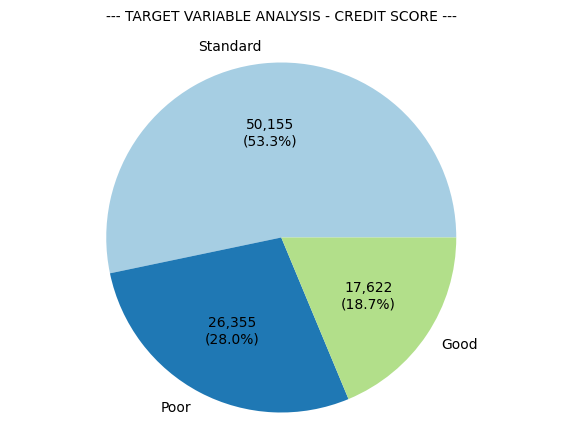

In [164]:
# Target Variable Analysis
credit_score = clean_df['Credit_Score'].value_counts()
def autopct_format(pct, sizes = credit_score.values):
    count = int(round(pct/100.*sum(sizes)))
    return f"{count:,}\n({pct:.1f}%)"

plt.figure(figsize=(7, 5))
plt.pie(credit_score, labels=credit_score.index, autopct=lambda pct: autopct_format(pct), colors=plt.cm.Paired.colors)
plt.title('--- TARGET VARIABLE ANALYSIS - CREDIT SCORE ---\n', fontsize=10)
plt.axis('equal')
plt.show()

#### ***Using Countplot for Categorical variables***
***Rationale:***
- It shows the absolute count of each category in the dataset, & are easy to interpret.
- They make it easy to spot imbalances or rare categories that may impact modeling or require special handling.

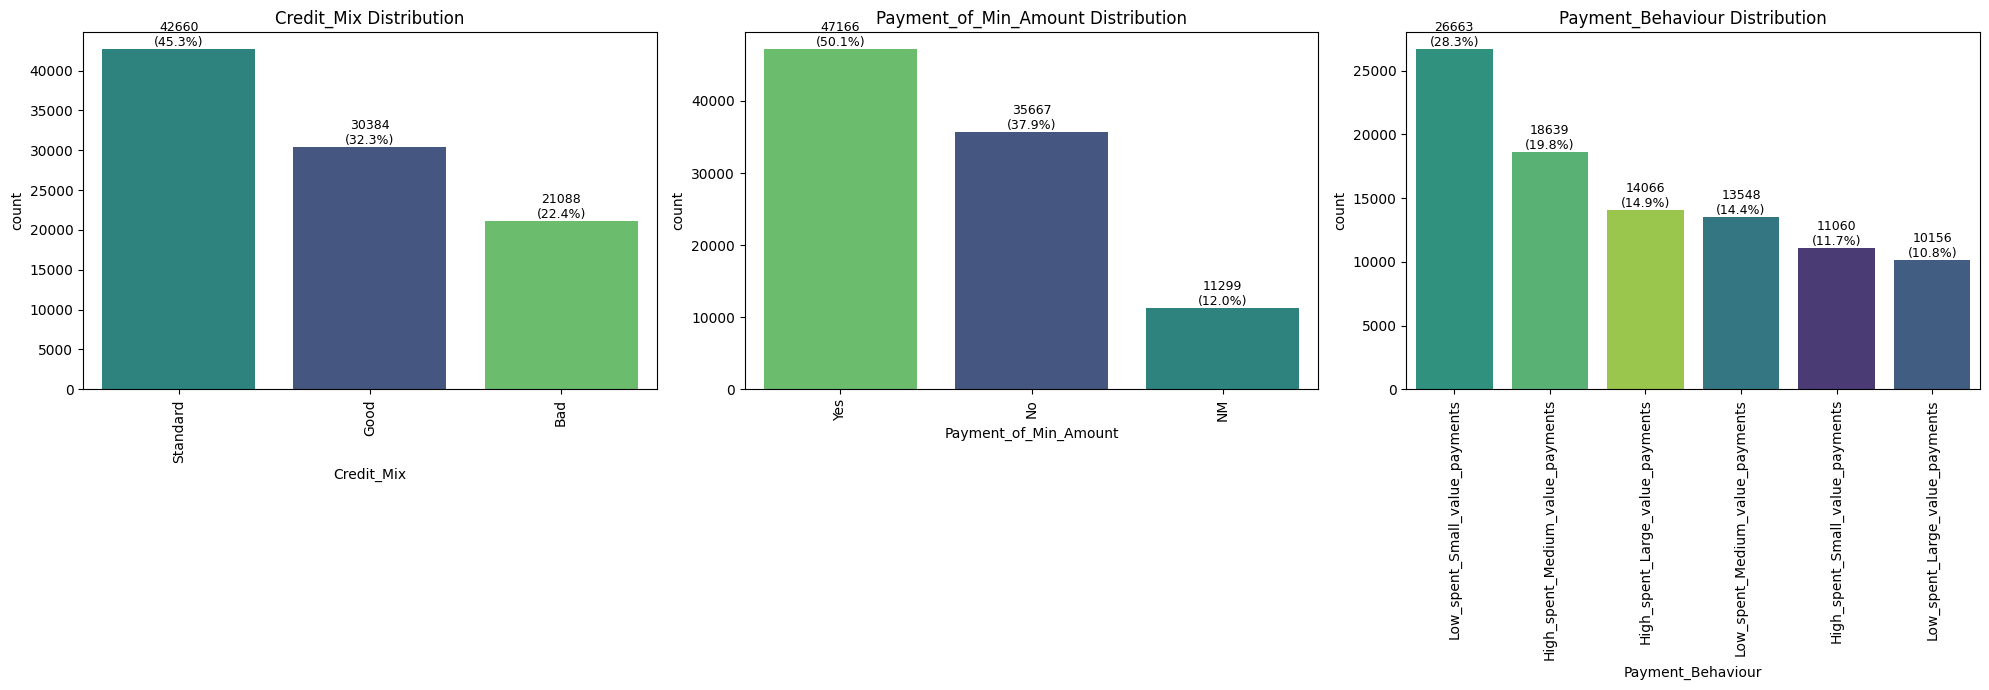

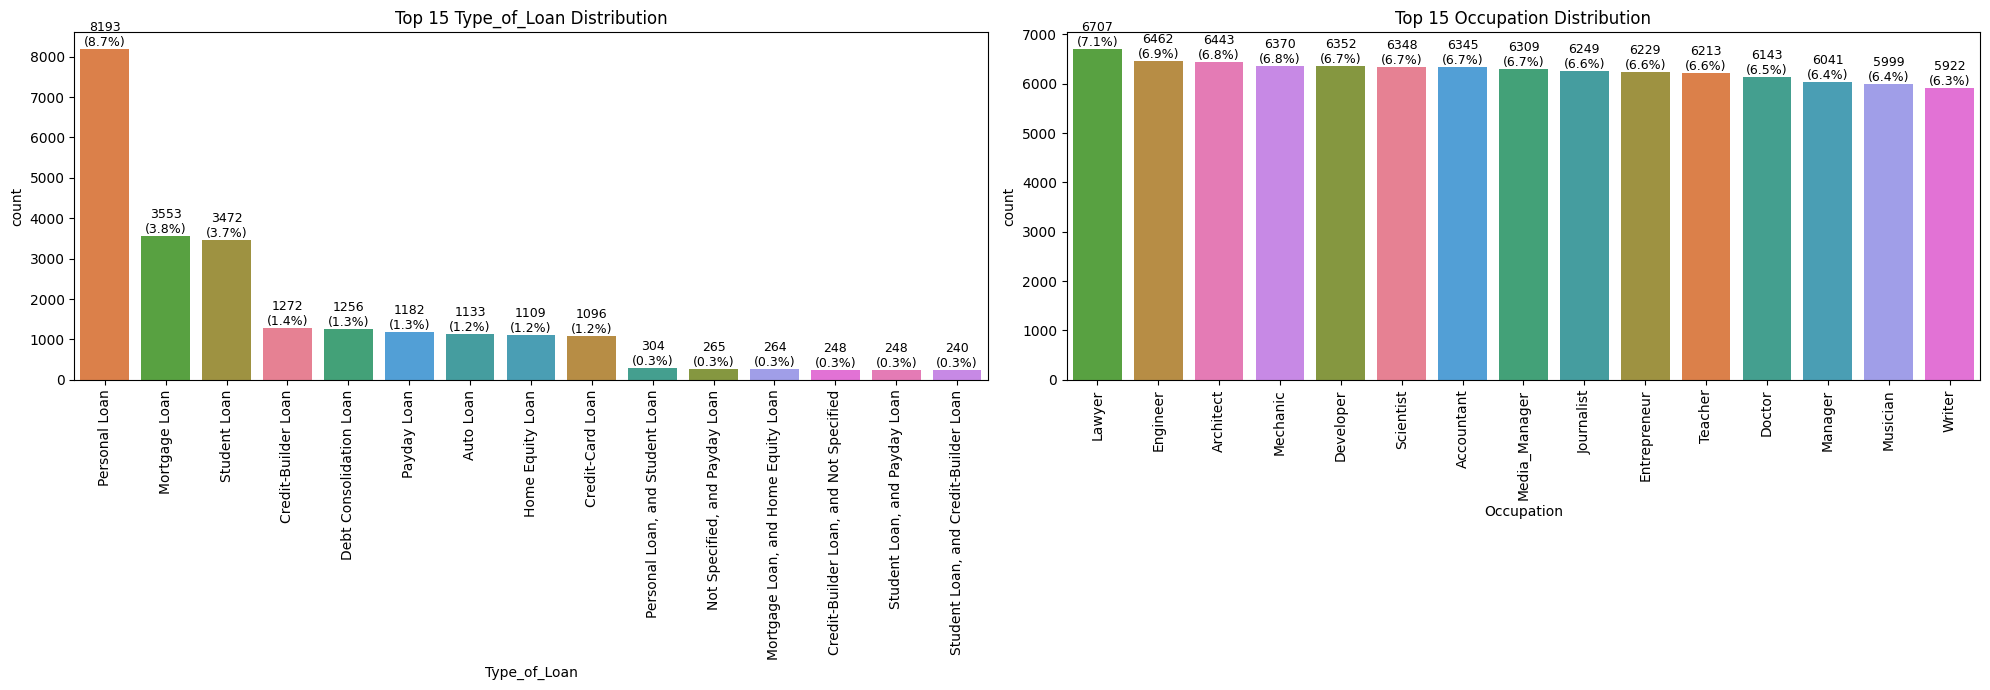

In [165]:
def plot_cat_features(df, cat_features):
    # Function to add counts & percentages
    def add_labels(ax, total):
        for p in ax.patches:
            count = int(p.get_height())
            if count > 0:
                percentage = 100 * count / total
                ax.annotate(f"{count}\n({percentage:.1f}%)",(p.get_x() + p.get_width() / 2., p.get_height()),ha="center", va="bottom", fontsize=9, color="black", rotation=0)

    # Countplot for 3 categorical features
    features = [col for col in cat_features if col not in ["Type_of_Loan", "Occupation", "Credit_Score"]]
    fig, axes = plt.subplots(1, 3, figsize=(20,7))

    for i, col in enumerate(features):
        ax = sns.countplot(x=col, data=df, hue=col, legend=False, order=df[col].value_counts().index, ax=axes[i], palette="viridis")
        axes[i].set_title(f"{col} Distribution")
        axes[i].tick_params(axis="x", rotation=90)
        add_labels(ax, total=len(df))

    plt.tight_layout()
    plt.show()
    
    # Countplot of top 15 categories in Type_of_Loan & Occupation since they have many unique values
    fig, axes = plt.subplots(1, 2, figsize=(20,7))

    for i, col in enumerate(["Type_of_Loan", "Occupation"]):
        top_vals = df[col].value_counts().nlargest(15).index
        ax = sns.countplot(x=col, data=df[df[col].isin(top_vals)], hue=col, legend=False, order=top_vals, ax=axes[i])
        axes[i].set_title(f"Top 15 {col} Distribution")
        axes[i].tick_params(axis="x", rotation=90)
        add_labels(ax, total=len(df)) 

    plt.tight_layout()
    plt.show()

plot_cat_features(clean_df, cat_features)

- ***Credit Mix:*** Standard credit mix is most common at 45.3%, followed by Good at 32.3%. Moderate risk profile across the portfolio with relatively few "Bad" credit customers.
- ***Payment of Min Amount:*** Split customer base: 50.1% consistently pay minimums vs 37.9% who don't. Payment reliability concerns for a significant portion of borrowers.
- ***Payment Behaviour:*** Conservative spending patterns dominate with "Low_spent_Small_value_payments" at 28.3%. Fairly even distribution across payment behaviors, indicating diverse financial habits.
- ***Type of Loan:*** Personal loans dominate with 8.7% of all loans, showing heavy concentration in unsecured lending. All other loan types combined make up <13%, indicating limited product diversification.
- ***Occupation:*** Well-balanced distribution across professions with lawyers leading at only 7.1%. No occupation dominates significantly, showing good customer diversification.

#### **Bivariate Analysis** 

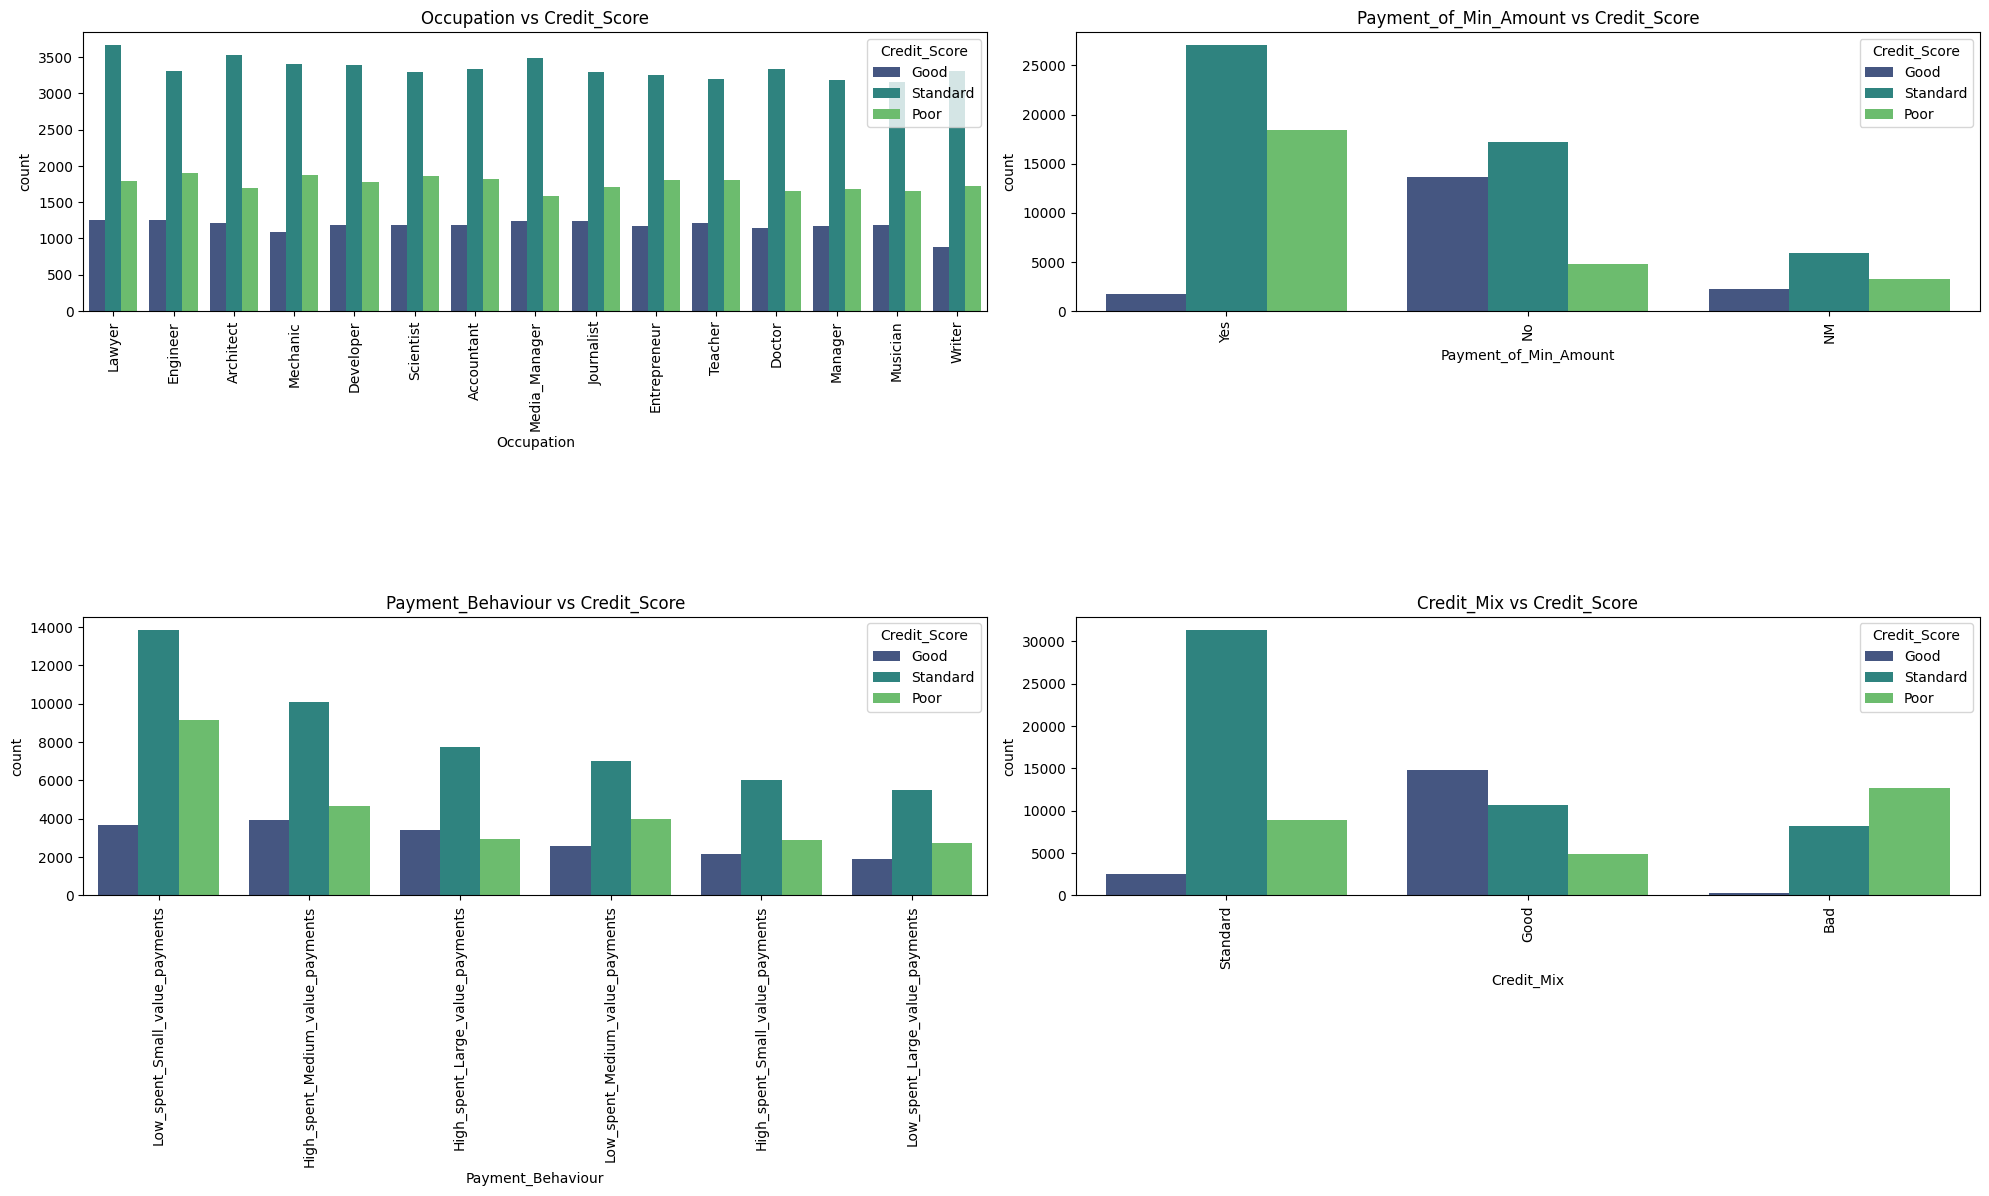

In [166]:
# Countplots for categorical vs target
cat_cols = ["Occupation", "Payment_of_Min_Amount", "Payment_Behaviour", "Credit_Mix"]

plt.figure(figsize=(20,15))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(3, 2, i)
    sns.countplot(x=col, hue="Credit_Score", data=clean_df, order=clean_df[col].value_counts().index, palette="viridis")
    plt.title(f"{col} vs Credit_Score")
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

- ***Occupation vs Credit Score:***
Credit scores are consistent across all occupations with similar distributions of Good, Standard, and Poor ratings.
No occupation shows significantly better or worse creditworthiness, indicating occupation alone isn't a strong predictor of credit risk.

- ***Payment of Min Amount vs Credit Score:***
Customers who make minimum payments have better credit profiles with more "Standard" and "Good" sco`res.
Non-payers show higher risk with more "Poor" credit scores, confirming payment behavior as a credit risk indicator.

- ***Payment Behaviour vs Credit Score:***
Low-spending customers dominate all credit score categories, especially in Standard and Poor segments.
Payment behavior patterns are relatively consistent across credit score groups with no dramatic shifts.

- ***Credit Mix vs Credit Score:***
Standard credit mix customers have the best credit profiles with highest Good and Standard score concentrations.
Bad credit mix correlates with poorer credit scores, showing credit diversification as a positive creditworthiness factor.

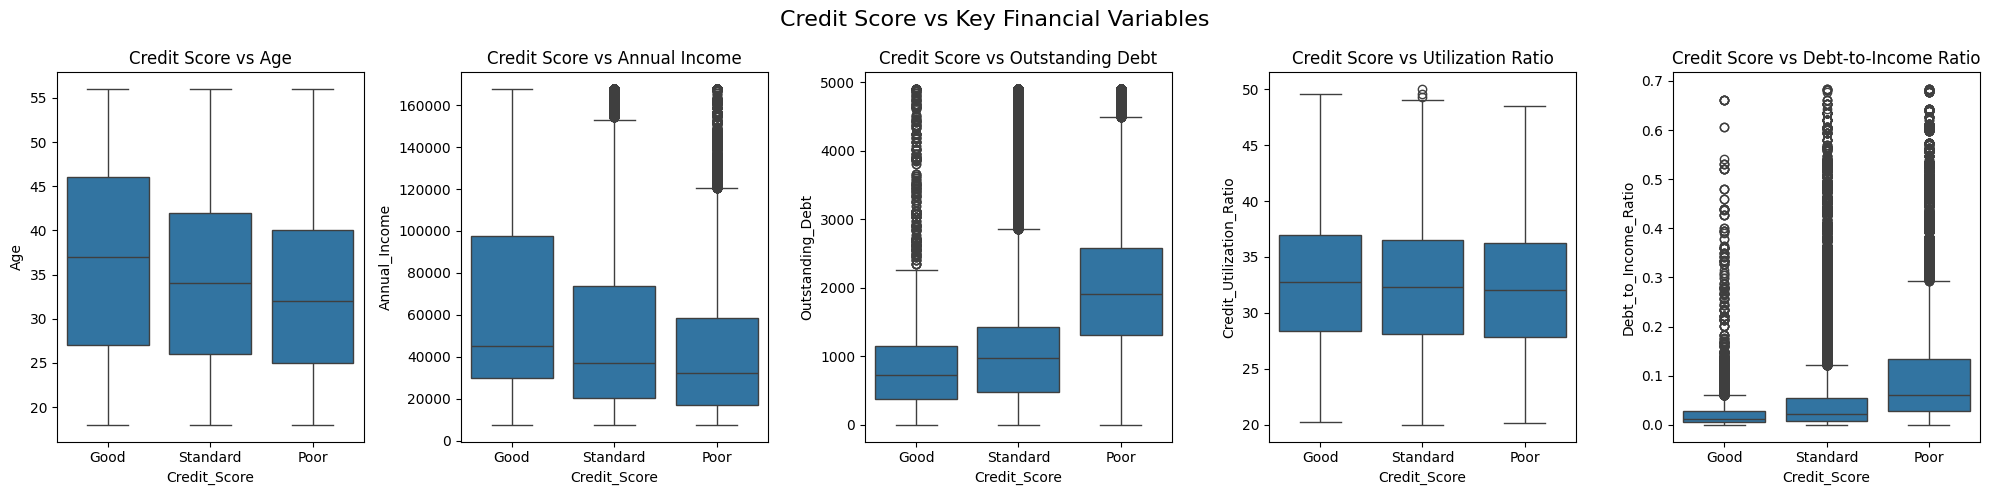

In [167]:
# Create subplots for Credit Score vs Key Variables
fig, axes = plt.subplots(1, 5, figsize=(20, 5))
fig.suptitle('Credit Score vs Key Financial Variables', fontsize=16)

# Credit Score vs Age
sns.boxplot(x='Credit_Score', y='Age', data=clean_df, ax=axes[0])
axes[0].set_title("Credit Score vs Age")
axes[0].tick_params(axis='x')

# Credit Score vs Annual Income
sns.boxplot(x='Credit_Score', y='Annual_Income', data=clean_df, ax=axes[1])
axes[1].set_title("Credit Score vs Annual Income")
axes[1].tick_params(axis='x')

# Credit Score vs Outstanding Debt
sns.boxplot(x='Credit_Score', y='Outstanding_Debt', data=clean_df, ax=axes[2])
axes[2].set_title("Credit Score vs Outstanding Debt")
axes[2].tick_params(axis='x')

# Credit Score vs Utilization Ratio
sns.boxplot(x='Credit_Score', y='Credit_Utilization_Ratio', data=clean_df, ax=axes[3])
axes[3].set_title("Credit Score vs Utilization Ratio")
axes[3].tick_params(axis='x')

# Credit Score vs Debt-to-Income
sns.boxplot(x='Credit_Score', y='Debt_to_Income_Ratio', data=clean_df, ax=axes[4])
axes[4].set_title("Credit Score vs Debt-to-Income Ratio")
axes[4].tick_params(axis='x')

plt.tight_layout()
plt.show()

- ***Credit Score vs Age:***
Good credit customers are slightly younger with median age around 37, while Standard and Poor credit customers are similar around 34.
Age shows minimal impact on creditworthiness with overlapping distributions across all credit score categories.

- ***Credit Score vs Annual Income:***
Higher income strongly correlates with better credit scores - Good credit customers have significantly higher median incomes (~$60k vs ~$35k).
Clear income stratification exists across credit tiers, making income a strong predictor of creditworthiness.

- ***Credit Score vs Outstanding Debt:***
Debt levels are surprisingly similar across credit scores with overlapping distributions around $1,000-$2,500.
Outstanding debt amount alone doesn't differentiate credit risk, suggesting debt management matters more than absolute debt levels.

- ***Credit Score vs Utilization Ratio:***
Credit utilization shows minimal variation across credit score groups with similar median ratios around 30%.
Utilization ratio appears to be a weak predictor of credit score in this dataset.

- ***Credit Score vs Debt-to-Income Ratio:***
Poor credit customers have dramatically higher debt-to-income ratios with many extreme outliers above 0.5.
Debt-to-income ratio is the strongest differentiator, clearly separating credit risk levels with Good customers clustered near 0.05.

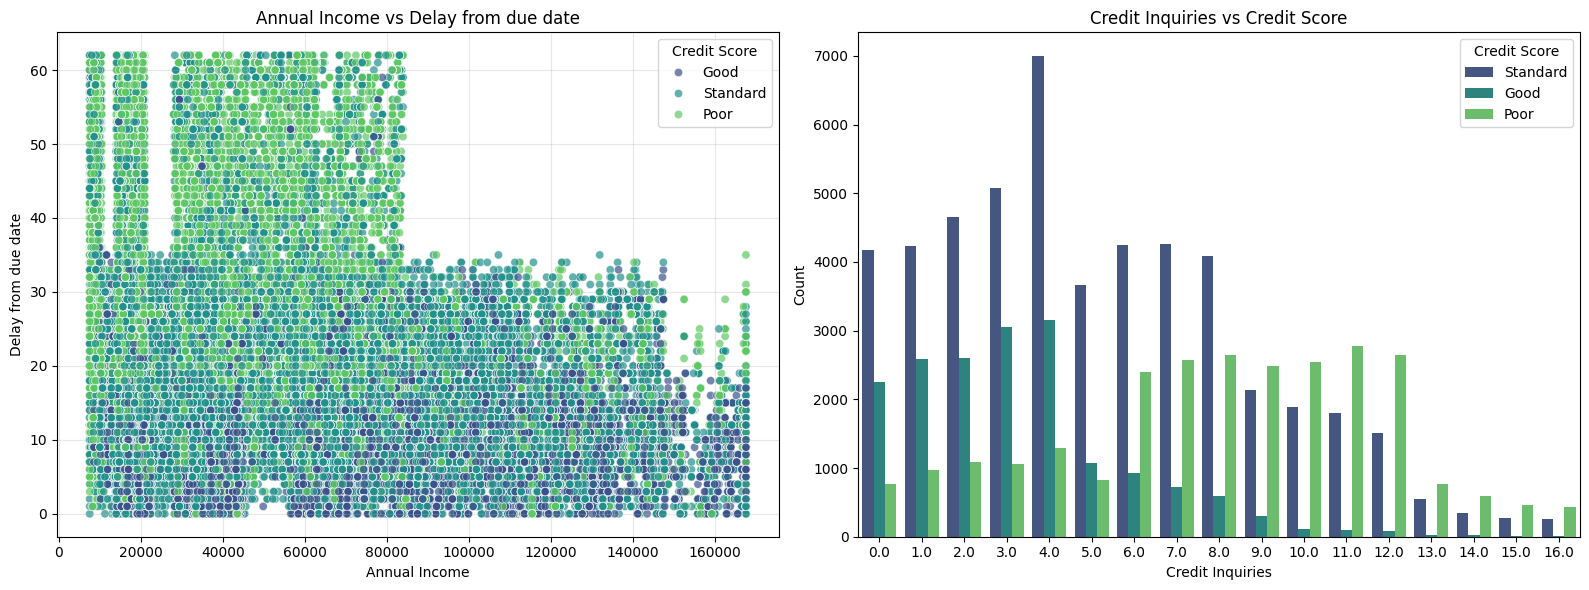

In [168]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Relationship between Annual Income & Payment Delays
delay_col = "Delay_from_due_date"
sns.scatterplot(data=clean_df, x="Annual_Income", y=delay_col, hue="Credit_Score", palette="viridis", alpha=0.7, ax=axes[0])
axes[0].set_title(f"Annual Income vs {delay_col.replace('_', ' ')}")
axes[0].set_xlabel("Annual Income")
axes[0].set_ylabel(delay_col.replace("_", " "))
axes[0].grid(True, alpha=0.3)
axes[0].legend(title="Credit Score", loc="best")

# Relationship between Credit Inquiries & Credit Score
sns.countplot(data=clean_df, x="Num_Credit_Inquiries", hue="Credit_Score", palette="viridis", ax=axes[1])
axes[1].set_title("Credit Inquiries vs Credit Score")
axes[1].set_xlabel("Credit Inquiries")
axes[1].set_ylabel("Count")
axes[1].legend(title="Credit Score", loc="best")

plt.tight_layout()
plt.show()

- ***Annual Income vs Delay from due date:***
Higher income customers show significantly fewer payment delays with most high earners (>$80k) clustered in the 0-10 day delay range.
Lower income customers exhibit more payment delays with Poor credit customers concentrated in lower income brackets and higher delay periods.

- ***Credit Inquiries vs Credit Score:***
Standard credit customers dominate across all inquiry levels with peak activity around 3-4 inquiries.
Excessive credit inquiries (>12) correlate with poor credit scores, showing fewer Standard/Good credit customers and more Poor credit customers in high inquiry ranges.

#### **Multivariate Analysis** 

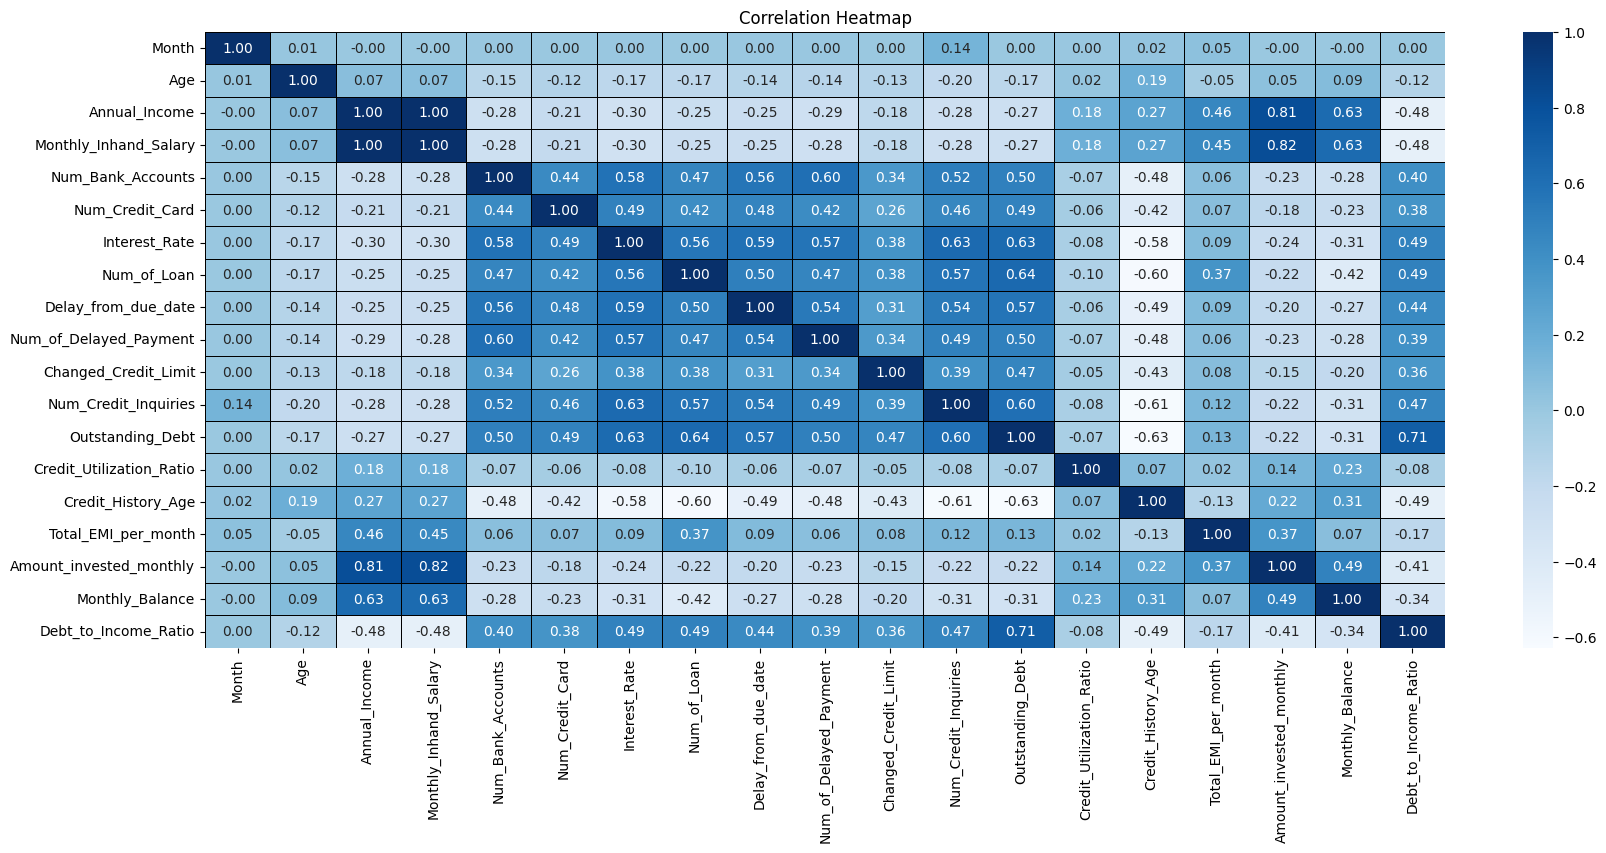

In [169]:
num_features = clean_df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(20,8))
sns.heatmap(clean_df[num_features].corr(), annot=True, fmt='.2f', cmap="Blues", linewidths=0.5, linecolor='black')
plt.title("Correlation Heatmap")
plt.show()

<Figure size 2000x800 with 0 Axes>

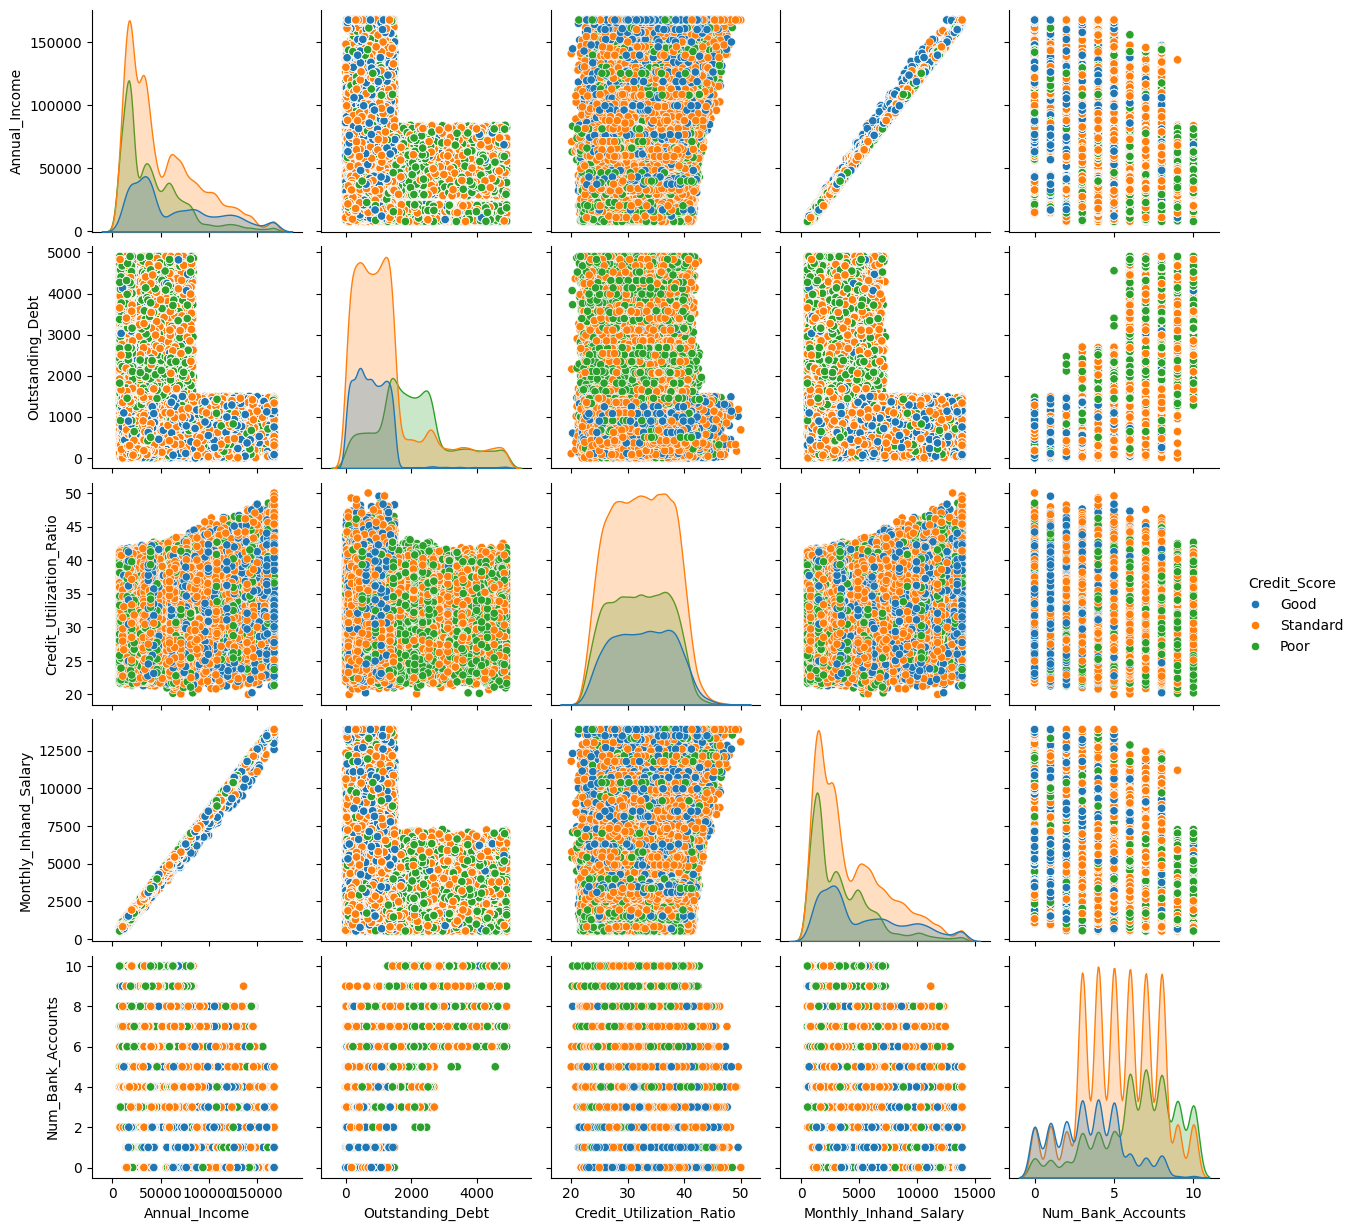

In [170]:
# Pairplot for selected features
plt.figure(figsize=(20,8))
fig.suptitle('Credit Score Pair Plot', fontsize=14)
fig = sns.pairplot(clean_df[['Annual_Income','Outstanding_Debt','Credit_Utilization_Ratio', 
                       'Monthly_Inhand_Salary','Num_Bank_Accounts','Credit_Score']], hue="Credit_Score")
plt.show()

### **Key Recommendations for Paisabazaar**

#### **Current Portfolio Status**

- 53.3% Standard Credit (Moderate Risk)
- 28.0% Poor Credit (High Risk)
- 18.7% Good Credit (Low Risk)

#### **Top 2 Action Items**
**1. Strengthen Risk Assessment**

- Debt-to-Income Ratio: Reject customers with DTI >0.5
- Annual Income: Prioritize customers earning >₹60k annually
- Payment History: Flag non-minimum payers as high risk

**2. Reduce Portfolio Risk**

- Set up alerts for customers with >10 days payment delays
- Monitor customers with >8 credit inquiries (credit-seeking behavior)
- Implement stricter screening for new customers

#### **Expected Impact**
- 15-20% reduction in defaults through better screening
- Improved portfolio quality by targeting right customer segments
- Higher profitability from premium customers (income >₹80k)

#### **Quick Wins**
- Create DTI ratio calculator for loan approvals
- Set up payment delay monitoring system
- Target high-income professionals for acquisition
- Implement risk-based pricing model

#### **Success Metrics**
- Reduce Poor credit segment from 28% to 20%
- Increase Good credit segment from 18.7% to 25%
- Achieve <5% default rate on new acquisitions

### **Conclusion**
The analysis of customer data provides valuable insights into the factors influencing credit scores and offers guidance for Paisabazaar's credit assessment processes. The findings offer valuable insights for Paisabazaar to refine their credit assessment models and improve risk management strategies by focusing on specific customer segments and tailoring their financial product offerings. 
Additionally, the analysis highlights the need for continuous monitoring of credit score trends and customer behavior to stay updated with evolving financial landscapes.